# UNSUPERVISED LEARNING TECHNIQUES
Although most of the applications of machine learning today are based on supervised learning (and as a result, this is where most of the investments go to), the vast majority of the available data is unlabeled: we have the input features $X$, but we do not have the labels $y$. The computer scientist Yann LeCun famously said that “if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake.” In other words, there is a huge potential in unsupervised learning that we have only barely started to sink our teeth into.

Say you want to create a system that will take a few pictures of each item on a manufacturing production line and detect which items are defective. You can fairly easily create a system that will take pictures automatically, and this might give you thousands of pictures every day. You can then build a reasonably large dataset in just a few weeks. But wait, there are no labels! If you want to train a regular binary classifier that will predict whether an item is defective or not, you will need to label every single picture as “defective” or “normal”. This will generally require human experts to sit down and manually go through all the pictures. This is a long, costly, and tedious task, so it will usually only be done on a small subset of the available pictures. As a result, the labeled dataset will be quite small, and the classifier’s performance will be disappointing. Moreover, every time the company makes any change to its products, the whole process will need to be started over from scratch. Wouldn’t it be great if the algorithm could just exploit the unlabeled data without needing humans to label every picture? Enter unsupervised learning.

In Chapter 8 we looked at the most common unsupervised learning task: dimensionality reduction. In this chapter we will look at a few more unsupervised tasks:

**Clustering**
The goal is to group similar instances together into clusters. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

**Anomaly detection** (also called outlier detection)
The objective is to learn what “normal” data looks like, and then use that to detect abnormal instances. These instances are called anomalies, or outliers, while the normal instances are called inliers. Anomaly detection is useful in a wide variety of applications, such as fraud detection, detecting defective products in manufacturing, identifying new trends in time series, or removing outliers from a dataset before training another model, which can significantly improve the performance of the resulting model.

**Density estimation**
This is the task of estimating the probability density function (PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization.

Ready for some cake? We will start with two clustering algorithms, k-means and DBSCAN, then we’ll discuss Gaussian mixture models and see how they can be used for density estimation, clustering, and anomaly detection.

# CLUSTERING ALGORITHMS: K-MEANS AND DBSCAN
As you enjoy a hike in the mountains, you stumble upon a plant you have never seen before. You look around and you notice a few more. They are not identical, yet they are sufficiently similar for you to know that they most likely belong to the same species (or at least the same genus). You may need a botanist to tell you what species that is, but you certainly don’t need an expert to identify groups of similar-looking objects. This is called clustering: it is the task of identifying similar instances and assigning them to clusters, or groups of similar instances.

Just like in classification, each instance gets assigned to a group. However, unlike classification, clustering is an unsupervised task. Consider Figure 9-1: on the left is the iris dataset (introduced in Chapter 4), where each instance’s species (i.e., its class) is represented with a different marker. It is a labeled dataset, for which classification algorithms such as logistic regression, SVMs, or random forest classifiers are well suited. On the right is the same dataset, but without the labels, so you cannot use a classification algorithm anymore. This is where clustering algorithms step in: many of them can easily detect the lower-left cluster. It is also quite easy to see with our own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct subclusters. That said, the dataset has two additional features (sepal length and width) that are not represented here, and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster).



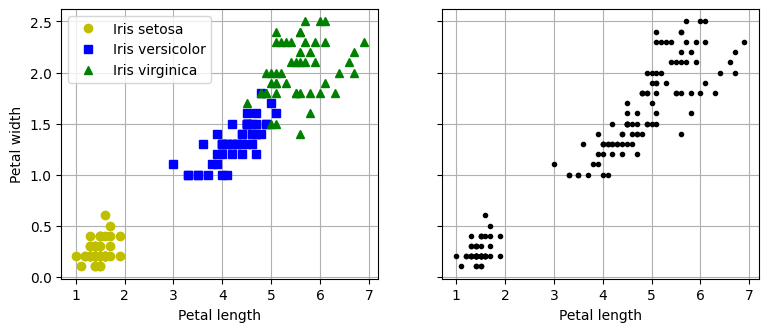

In [1949]:
# extra code – this cell generates and saves Figure 9–1

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y == 0, 2], X[y == 0, 3], "yo", label="Iris setosa")
plt.plot(X[y == 1, 2], X[y == 1, 3], "bs", label="Iris versicolor")
plt.plot(X[y == 2, 2], X[y == 2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()
# Note: the next cell shows how a Gaussian mixture model (explained later in this chapter) can actually separate these clusters pretty well using all 4 features: petal length & width, and sepal length & width. This code maps each cluster to a class. Instead of hard coding the mapping, the code picks the most common class for each cluster using the scipy.stats.mode() function:

# Figure 9-1. Classification (left) versus clustering (right)

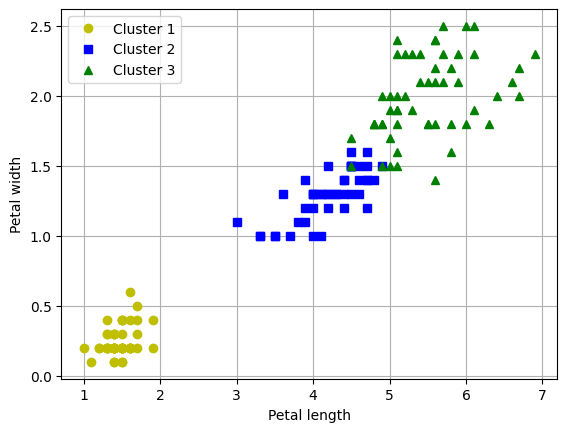

In [1950]:
# extra code

import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y == class_id])
    mapping[mode] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred == 0, 2], X[y_pred == 0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred == 1, 2], X[y_pred == 1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred == 2, 2], X[y_pred == 2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

What's the ratio of iris plants we assigned to the right cluster?

In [1951]:
(y_pred == y).sum() / len(y_pred)

0.9666666666666667

Clustering is used in a wide variety of applications, including:

**Customer segmentation**
You can cluster your customers based on their purchases and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

**Data analysis**
When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

**Dimensionality reduction**
Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster; affinity is any measure of how well an instance fits into a cluster. Each instance’s feature vector $x$ can then be replaced with the vector of its cluster affinities. If there are $k$ clusters, then this vector is k-dimensional. The new vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.

**Feature engineering**
The cluster affinities can often be useful as extra features. For example, we used k-means in Chapter 2 to add geographic cluster affinity features to the California housing dataset, and they helped us get better performance.

**Anomaly detection** (also called outlier detection)
Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second.

**Semi-supervised learning**
If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

**Search engines**
Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you’d need to do is use the trained clustering model to find this image’s cluster, and you could then simply return all the images from this cluster.

**Image segmentation**
By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in an image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will capture different kinds of clusters. Some algorithms look for instances centered around a particular point, called a centroid. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some algorithms are hierarchical, looking for clusters of clusters. And the list goes on.

In this section, we will look at two popular clustering algorithms, k-means and DBSCAN, and explore some of their applications, such as nonlinear dimensionality reduction, semi-supervised learning, and anomaly detection.

# K-MEANS
Consider the unlabeled dataset represented in Figure 9-2: you can clearly see five blobs of instances. The k-means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations. It was proposed by Stuart Lloyd at Bell Labs in 1957 as a technique for pulse-code modulation, but it was only published outside of the company in 1982. In 1965, Edward W. Forgy had published virtually the same algorithm, so k-means is sometimes referred to as the Lloyd–Forgy algorithm.

Let’s train a k-means clusterer on this dataset. It will try to find each blob’s center and assign each instance to the closest blob:

In [1952]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

Note: Throughout this notebook, when n_init was not set when creating a KMeans estimator, I explicitly set it to n_init=10 to avoid a warning about the fact that the default value for this hyperparameter will change from 10 to "auto" in Scikit-Learn 1.4.

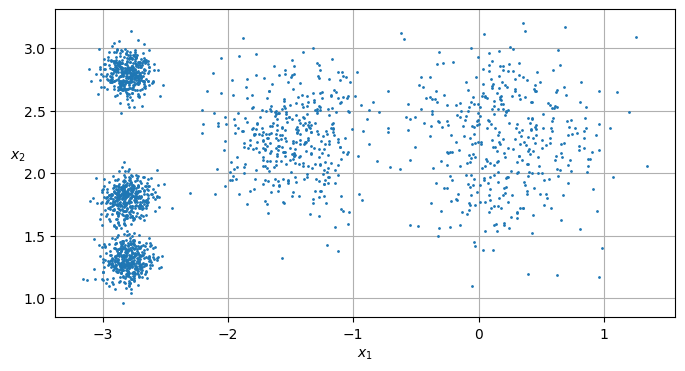

In [1953]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

# Figure 9-2. An unlabeled dataset composed of five blobs of instances

Note that you have to specify the number of clusters $k$ that the algorithm must find. In this example, it is pretty obvious from looking at the data that $k$ should be set to 5, but in general it is not that easy. We will discuss this shortly.

Each instance will be assigned to one of the five clusters. In the context of clustering, an instance’s label is the index of the cluster to which the algorithm assigns this instance; this is not to be confused with the class labels in classification, which are used as targets (remember that clustering is an unsupervised learning task). The KMeans instance preserves the predicted labels of the instances it was trained on, available via the labels_ instance variable:

In [1954]:
# Each instance was assigned to one of the 5 clusters:
y_pred

array([0, 0, 4, ..., 3, 1, 0])

In [1955]:
y_pred is kmeans.labels_

True

We can also take a look at the five centroids that the algorithm found:

In [1956]:
# And the following 5 centroids (i.e., cluster centers) were estimated:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [1957]:
# Note that the KMeans instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the label of an instance is the index of the cluster that instance gets assigned to (they are not targets, they are predictions):
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0])

You can easily assign new instances to the cluster whose centroid is closest:

In [1958]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# predict the labels of new instances:
kmeans.predict(X_new)

array([4, 4, 3, 3])

If you plot the cluster’s decision boundaries, you get a Voronoi tessellation: see Figure 9-3, where each centroid is represented with an X.

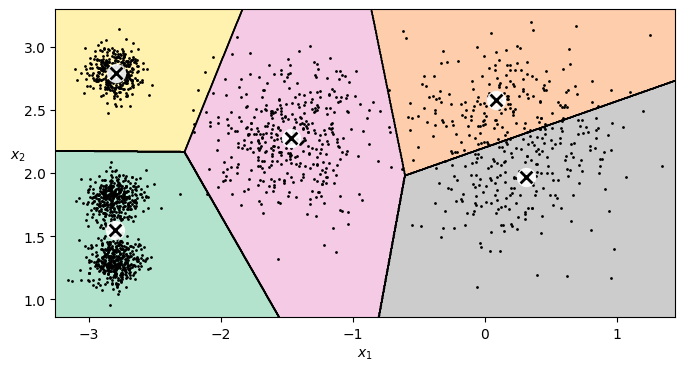

In [1959]:
# extra code – this cell generates and saves Figure 9–3

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()
# Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

# Figure 9-3. k-means decision boundaries (Voronoi tessellation)

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled, especially near the boundary between the top-left cluster and the central cluster. Indeed, the k-means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.

Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering. The score can be the distance between the instance and the centroid or a similarity score (or affinity), such as the Gaussian radial basis function we used in Chapter 2. In the KMeans class, the transform() method measures the distance from each instance to every centroid:

In [1960]:
# Rather than arbitrarily choosing the closest cluster for each instance, which is called hard clustering, it might be better to measure the distance of each instance to all 5 centroids. This is what the transform() method does:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

In [1961]:
# You can verify that this is indeed the Euclidian distance between each instance and each centroid:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

In this example, the first instance in X_new is located at a distance of about 2.81 from the first centroid, 0.33 from the second centroid, 2.90 from the third centroid, 1.49 from the fourth centroid, and 2.89 from the fifth centroid. If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique. Alternatively, you can use these distances as extra features to train another model, as in Chapter 2.

# K-MEANS ALGORITHM
So, how does the algorithm work? Well, suppose you were given the centroids. You could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the instance labels, you could easily locate each cluster’s centroid by computing the mean of the instances in that cluster. But you are given neither the labels nor the centroids, so how can you proceed? Start by placing the centroids randomly (e.g., by picking $k$ instances at random from the dataset and using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving. The algorithm is guaranteed to converge in a finite number of steps (usually quite small). That’s because the mean squared distance between the instances and their closest centroids can only go down at each step, and since it cannot be negative, it’s guaranteed to converge.

You can see the algorithm in action in Figure 9-4: the centroids are initialized randomly (top left), then the instances are labeled (top right), then the centroids are updated (center left), the instances are relabeled (center right), and so on. As you can see, in just three iterations the algorithm has reached a clustering that seems close to optimal.

NOTE
The computational complexity of the algorithm is generally linear with regard to the number of instances $m$, the number of clusters $k$, and the number of dimensions $n$. However, this is only true when the data has a clustering structure. If it does not, then in the worst-case scenario the complexity can increase exponentially with the number of instances. In practice, this rarely happens, and k-means is generally one of the fastest clustering algorithms.

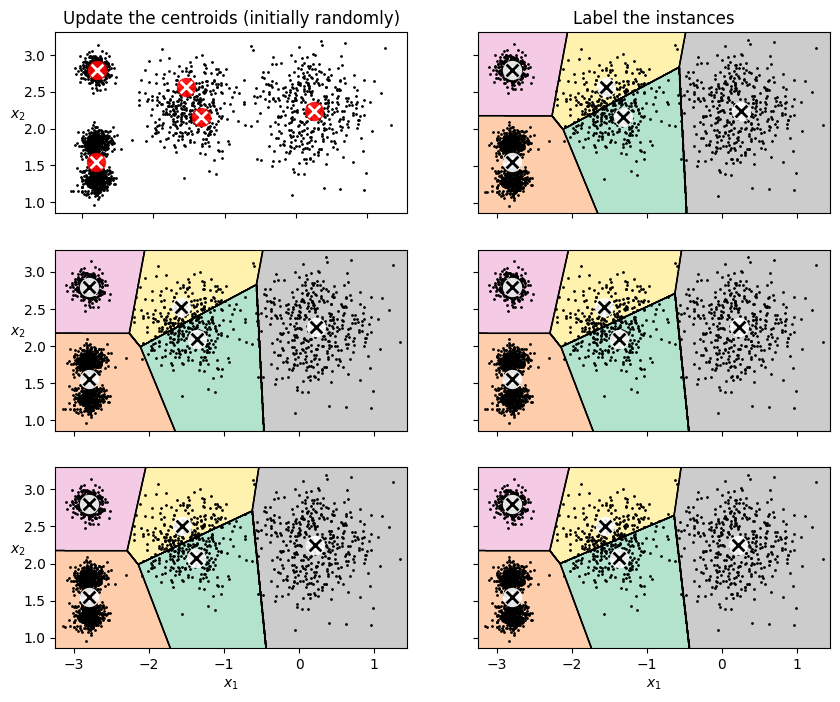

In [1962]:
# extra code – this cell generates and saves Figure 9–4

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

# Figure 9-4. K-means algorithm

Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization. Figure 9-5 shows two suboptimal solutions that the algorithm can converge to if you are not lucky with the random initialization step.

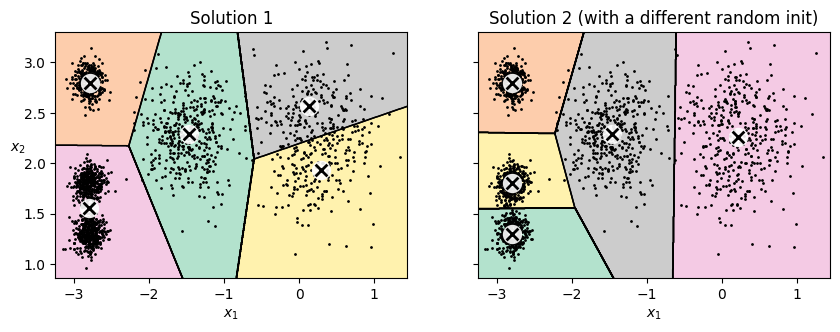

In [1963]:
# extra code – this cell generates and saves Figure 9–5

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)


kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")

plt.show()

# Figure 9-5. Two suboptimal solutions due to unlucky centroid initialization

Let’s take a look at a few ways you can mitigate this risk by improving the centroid initialization.

# CENTROID INITIALIZATION METHODS
If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:

In [1964]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

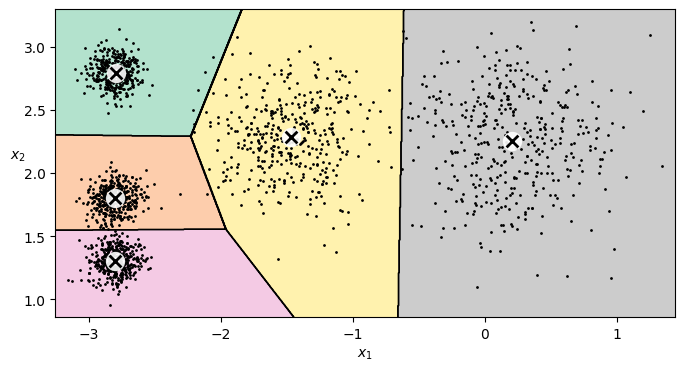

In [1965]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by the n_init hyperparameter: by default it is equal to 10, which means that the whole algorithm described earlier runs 10 times when you call fit(), and Scikit-Learn keeps the best solution. But how exactly does it know which solution is the best? It uses a performance metric! That metric is called the model’s inertia, which is the sum of the squared distances between the instances and their closest centroids. It is roughly equal to 219.4 for the model on the left in Figure 9-5, 258.6 for the model on the right in Figure 9-5, and only 211.6 for the model in Figure 9-3. The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia. In this example, the model in Figure 9-3 will be selected (unless we are very unlucky with n_init consecutive random initializations). If you are curious, a model’s inertia is accessible via the inertia_ instance variable:

In [1966]:
kmeans.inertia_

211.5985372581684

In [1967]:
kmeans_rnd_init1.inertia_  # extra code

219.58201503602282

In [1968]:

kmeans_rnd_init2.inertia_  # extra code

211.5985372581684

In [1969]:
# As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:
# extra code
X_dist = kmeans.transform(X)
(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum()

211.59853725816856

The score() method returns the negative inertia (it’s negative because a predictor’s score() method must always respect Scikit-Learn’s “greater is better” rule: if a predictor is better than another, its score() method should return a greater score):

In [1970]:
kmeans.score(X)

-211.5985372581684

An important improvement to the k-means algorithm, k-means++, was proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii. They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the k-means algorithm much less likely to converge to a suboptimal solution. The paper showed that the additional computation required for the smarter initialization step is well worth it because it makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution. The k-means++ initialization algorithm works like this:

1. Take one centroid $c^{(1)}$, chosen uniformly at random from the dataset.

2. Take a new centroid $c^{(1)}$, choosing an instance $x^{(i)}$ with probability $\frac{D(x^{(i)})^2}{\sum_{j=1}^m D(x^{(j)})^2}$ , where $D(x^{(i)})$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already chosen. This probability distribution ensures that instances farther away from already chosen centroids are much more likely to be selected as centroids.

3. Repeat the previous step until all $k$ centroids have been chosen.

The KMeans class uses this initialization method by default.

In [1971]:
# TODO: continue here

# MULTIPLE INITIALIZATIONS
So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia.

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10.

In [1972]:
# extra code
kmeans_rnd_10_inits = KMeans(
    n_clusters=5,
    init="random",
    n_init=10,
    random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)


As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming 
).

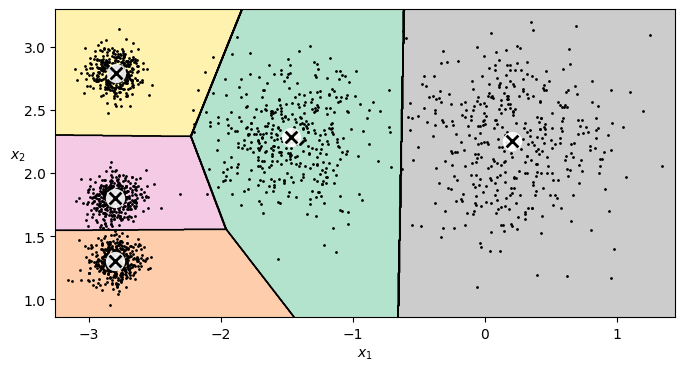

In [1973]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [1974]:
kmeans_rnd_10_inits.inertia_

211.5985372581684

# CENTROID INITIALIZATION METHODS
Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii:

Take one centroid 
, chosen uniformly at random from the dataset.
Take a new center 
, choosing an instance 
 with probability: 
 / 
 where 
 is the distance between the instance 
 and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
Repeat the previous step until all 
 centroids have been chosen.
The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default):

# ACCELERATED K-MEANS AND MINI-BATCH K-MEANS
Another improvement to the k-means algorithm was proposed in a 2003 paper by Charles Elkan.⁠3 On some large datasets with many clusters, the algorithm can be accelerated by avoiding many unnecessary distance calculations. Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between two points⁠4) and by keeping track of lower and upper bounds for distances between instances and centroids. However, Elkan’s algorithm does not always accelerate training, and sometimes it can even slow down training significantly; it depends on the dataset. Still, if you want to give it a try, set algorithm="elkan".

Yet another important variant of the k-means algorithm was proposed in a 2010 paper by David Sculley.⁠5 Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm (typically by a factor of three to four) and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the MiniBatchKMeans class, which you can use just like the KMeans class:

In [1975]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

# Note: Throughout this notebook, when n_init was not set when creating a MiniBatchKMeans estimator, I explicitly set it to n_init=3 to avoid a warning about the fact that the default value for this hyperparameter will change from 3 to "auto" in Scikit-Learn 1.4.

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [1976]:

minibatch_kmeans.inertia_

211.65899374574312

If the dataset does not fit in memory, the simplest option is to use the memmap class, as we did for incremental PCA in Chapter 8. Alternatively, you can pass one mini-batch at a time to the partial_fit() method, but this will require much more work, since you will need to perform multiple initializations and select the best one yourself.

Although the mini-batch k-means algorithm is much faster than the regular k-means algorithm, its inertia is generally slightly worse. You can see this in Figure 9-6: the plot on the left compares the inertias of mini-batch k-means and regular k-means models trained on the previous five-blobs dataset using various numbers of clusters k. The difference between the two curves is small, but visible. In the plot on the right, you can see that mini-batch k-means is roughly 3.5 times faster than regular k-means on this dataset.



In [1977]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

In [1978]:
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [1979]:
# Next, let's write the training set to a memmap:
import os

path_to_my_mnist = "saved_datasets/MNIST/my_mnist.mmap"

if not os.path.isfile(path_to_my_mnist):
    X_memmap = np.memmap(
        path_to_my_mnist,
        dtype='float32',
        mode='write',
        shape=X_train.shape
    )
    X_memmap[:] = X_train
    X_memmap.flush()

In [1980]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10,
                                   n_init=3, random_state=42)
X_memmap = np.memmap(
    path_to_my_mnist,
    dtype="float32",
    mode="readonly"
).reshape(X_train.shape)  # todo: mozna ten shape je spatne?
minibatch_kmeans.fit(X_memmap)

MiniBatchKMeans(batch_size=10, n_clusters=10, n_init=3, random_state=42)

In [1981]:
# # extra code – this cell generates and saves Figure 9–6
# 
# # Let's plot the inertia ratio and the training time ratio between Mini-batch K-Means and regular K-Means:
# from timeit import timeit
# 
# max_k = 100
# times = np.empty((max_k, 2))
# inertias = np.empty((max_k, 2))
# for k in range(1, max_k + 1):
#     kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
#     minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
#     print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
#     times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
#     times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
#                              globals=globals())
#     inertias[k - 1, 0] = kmeans_.inertia_
#     inertias[k - 1, 1] = minibatch_kmeans.inertia_
# 
# plt.figure(figsize=(10, 4))
# 
# plt.subplot(121)
# plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
# plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
# plt.xlabel("$k$")
# plt.title("Inertia")
# plt.legend()
# plt.axis([1, max_k, 0, 100])
# plt.grid()
# 
# plt.subplot(122)
# plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
# plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
# plt.xlabel("$k$")
# plt.title("Training time (seconds)")
# plt.axis([1, max_k, 0, 4])
# plt.grid()
# 
# plt.show()
# 
# # Figure 9-6. Mini-batch k-means has a higher inertia than k-means (left) but it is much faster (right), especially as k increases
# # Todo: proverit jestli ty grafy jsou ok, ten pravy se lisi od original notebooku autora

# FINDING THE OPTIMAL NUMBER OF CLUSTERS
So far, we’ve set the number of clusters k to 5 because it was obvious by looking at the data that this was the correct number of clusters. But in general, it won’t be so easy to know how to set k, and the result might be quite bad if you set it to the wrong value. As you can see in Figure 9-7, for this dataset setting k to 3 or 8 results in fairly bad models.

You might be thinking that you could just pick the model with the lowest inertia. Unfortunately, it is not that simple. The inertia for k=3 is about 653.2, which is much higher than for k=5 (211.6). But with k=8, the inertia is just 119.1. The inertia is not a good performance metric when trying to choose k because it keeps getting lower as we increase k. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s plot the inertia as a function of k. When we do this, the curve often contains an inflexion point called the elbow (see Figure 9-8).



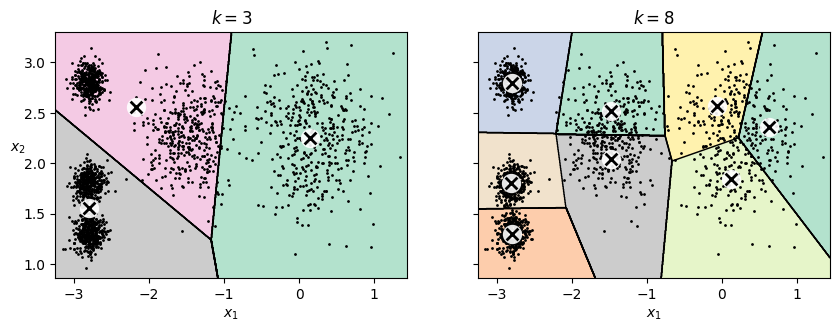

In [1982]:
# extra code – this cell generates and saves Figure 9–7

kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

# Figure 9-7. Bad choices for the number of clusters: when k is too small, separate clusters get merged (left), and when k is too large, some clusters get chopped into multiple pieces (right)

In [1983]:
# Ouch, these two models don't look great. What about their inertias?

kmeans_k3.inertia_

653.2167190021553

In [1984]:
kmeans_k8.inertia_

119.22484592677122

No, we cannot simply take the value of 
 that minimizes the inertia, since it keeps getting lower as we increase 
. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of 
 and analyze the resulting curve:

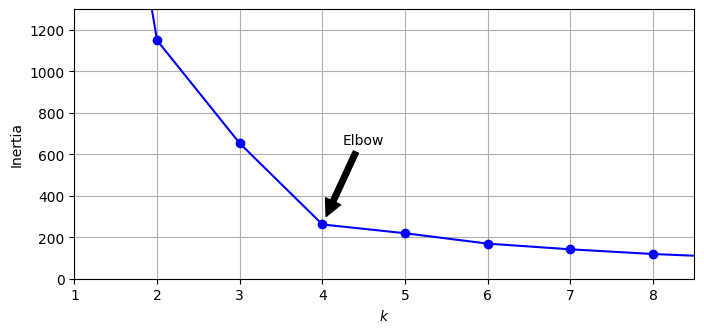

In [1985]:
# extra code – this cell generates and saves Figure 9–8

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

# Figure 9-8. Plotting the inertia as a function of the number of clusters k

As you can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an elbow at k = 4. So, if we did not know better, we might think 4 was a good choice: any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no good reason.

This technique for choosing the best value for the number of clusters is rather coarse. A more precise (but also more computationally expensive) approach is to use the silhouette score, which is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary; finally, a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

To compute the silhouette score, you can use Scikit-Learn’s silhouette_score() function, giving it all the instances in the dataset and the labels they were assigned:

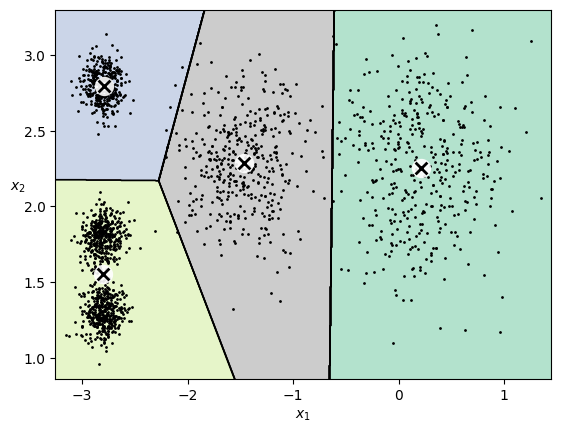

In [1986]:
# extra code
plot_decision_boundaries(kmeans_per_k[4 - 1], X)
plt.show()

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to (b - a) / max(a, b) where a is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and b is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes b, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [1987]:
# plot the silhouette score as a function of k
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

Let’s compare the silhouette scores for different numbers of clusters (see Figure 9-9).

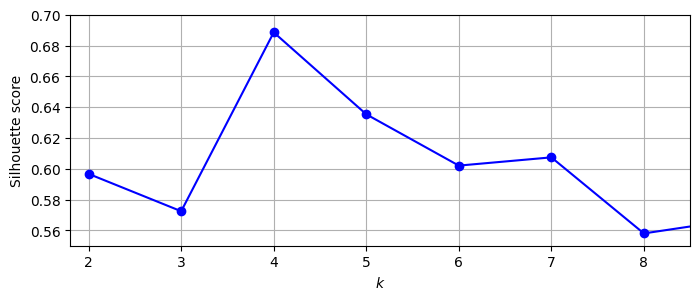

In [1988]:
# extra code – this cell generates and saves Figure 9–9

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

# Figure 9-9. Selecting the number of clusters k using the silhouette score

As you can see, this visualization is much richer than the previous one: although it confirms that k = 4 is a very good choice, it also highlights the fact that k = 5 is quite good as well, and much better than k = 6 or 7. This was not visible when comparing inertias.

An even more informative visualization is obtained when we plot every instance’s silhouette coefficient, sorted by the clusters they are assigned to and by the value of the coefficient. This is called a silhouette diagram (see Figure 9-10). Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances in the cluster, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).

The vertical dashed lines represent the mean silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters. Here we can see that when k = 3 or 6, we get bad clusters. But when k = 4 or 5, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the second from the bottom) is rather big. When k = 5, all clusters have similar sizes. So, even though the overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar sizes.

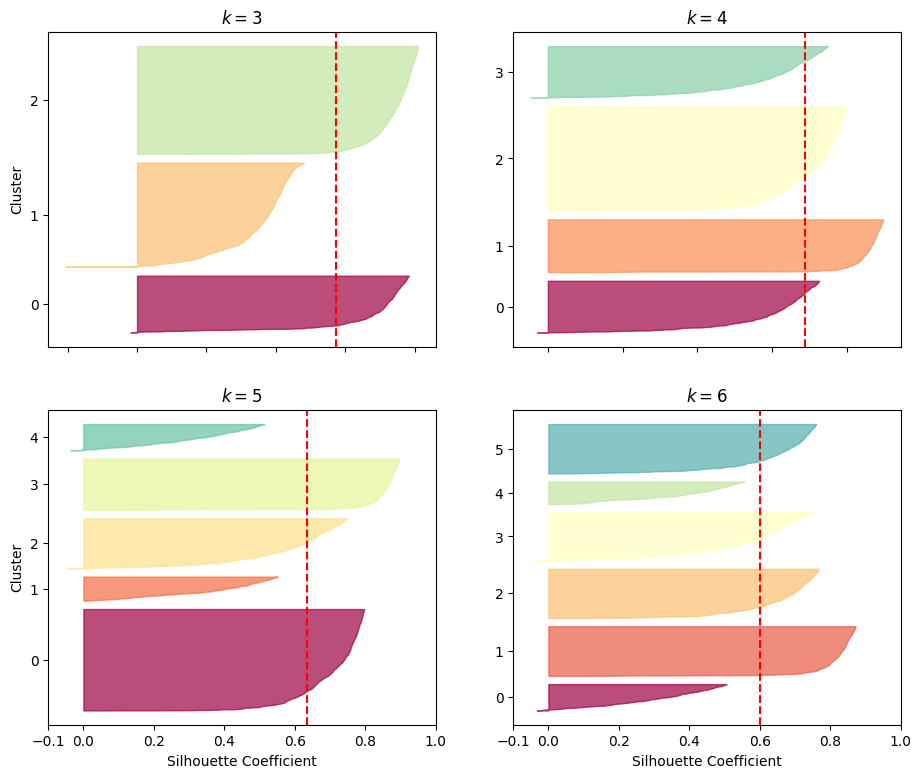

In [1989]:
# extra code – this cell generates and saves Figure 9–10

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

# Figure 9-10. Analyzing the silhouette diagrams for various values of k

As you can see, $k = 5$ looks like the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

# LIMITS OF K-MEANS
Despite its many merits, most notably being fast and scalable, k-means is not perfect. As we saw, it is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. Moreover, k-means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes. For example, Figure 9-11 shows how k-means clusters a dataset containing three ellipsoidal clusters of different dimensions, densities, and orientations.

As you can see, neither of these solutions is any good. The solution on the left is better, but it still chops off 25% of the middle cluster and assigns it to the cluster on the right. The solution on the right is just terrible, even though its inertia is lower. So, depending on the data, different clustering algorithms may perform better. On these types of elliptical clusters, Gaussian mixture models work great.



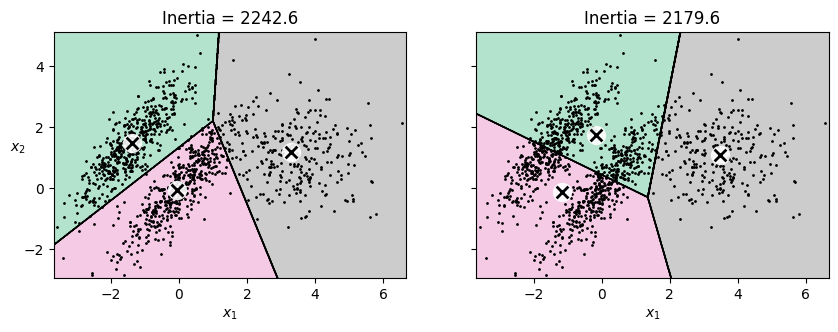

In [1990]:
# extra code – this cell generates and saves Figure 9–11

# Let's generate a more difficult dataset, with elongated blobs and varying densities, and show that K-Means struggles to cluster it correctly:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

plt.show()

# Figure 9-11. k-means fails to cluster these ellipsoidal blobs properly

TIP
It is important to scale the input features (see Chapter 2) before you run k-means, or the clusters may be very stretched and k-means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally helps k-means.

# USING CLUSTERING FOR IMAGE SEGMENTATION
Image segmentation is the task of partitioning an image into multiple segments. There are several variants:

In color segmentation, pixels with a similar color get assigned to the same segment. This is sufficient in many applications. For example, if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.

- In semantic segmentation, all pixels that are part of the same object type get assigned to the same segment. For example, in a self-driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would be one segment containing all the pedestrians).

- In instance segmentation, all pixels that are part of the same individual object are assigned to the same segment. In this case there would be a different segment for each pedestrian.

- The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks (see Chapter 14). In this chapter we are going to focus on the (much simpler) color segmentation task, using k-means.

We’ll start by importing the Pillow package (successor to the Python Imaging Library, PIL), which we’ll then use to load the ladybug.png image (see the upper-left image in Figure 9-12), assuming it’s located at filepath:

In [1991]:
from PIL import Image

filepath = "../images/ladybug.png"
image = np.asarray(Image.open(filepath))
image.shape

(533, 800, 3)

The image is represented as a 3D array. The first dimension’s size is the height; the second is the width; and the third is the number of color channels, in this case red, green, and blue (RGB). In other words, for each pixel there is a 3D vector containing the intensities of red, green, and blue as unsigned 8-bit integers between 0 and 255. Some images may have fewer channels (such as grayscale images, which only have one), and some images may have more channels (such as images with an additional alpha channel for transparency, or satellite images, which often contain channels for additional light frequencies (like infrared).

The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using k-means with eight clusters. It creates a segmented_img array containing the nearest cluster center for each pixel (i.e., the mean color of each pixel’s cluster), and lastly it reshapes this array to the original image shape. The third line uses advanced NumPy indexing; for example, if the first 10 labels in kmeans_.labels_ are equal to 1, then the first 10 colors in segmented_img are equal to kmeans.cluster_centers_[1]:

In [1992]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

This outputs the image shown in the upper right of Figure 9-12. You can experiment with various numbers of clusters, as shown in the figure. When you use fewer than eight clusters, notice that the ladybug’s flashy red color fails to get a cluster of its own: it gets merged with colors from the environment. This is because k-means prefers clusters of similar sizes. The ladybug is small—much smaller than the rest of the image—so even though its color is flashy, k-means fails to dedicate a cluster to it.

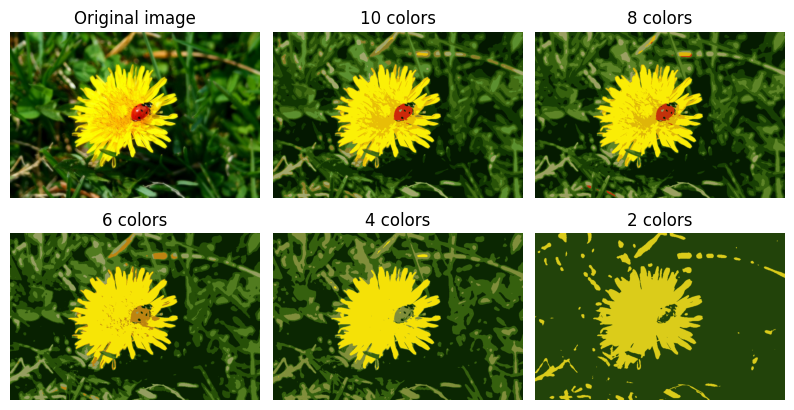

In [1993]:
# extra code – this cell generates and saves Figure 9–12

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

# Figure 9-12. Image segmentation using k-means with various numbers of color clusters 

# USING CLUSTERING FOR SEMI-SUPERVISED LEARNING
Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances. In this section, we’ll use the digits dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing the digits 0 to 9. First, let’s load and split the dataset (it’s already shuffled):

In [1994]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

We will pretend we only have labels for 50 instances. To get a baseline performance, let’s train a logistic regression model on these 50 labeled instances:

In [1995]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000, random_state=42)

We can then measure the accuracy of this model on the test set (note that the test set must be labeled):

In [1996]:
log_reg.score(X_test, y_test)

0.7581863979848866

The model’s accuracy is just 74.8%. That’s not great: indeed, if you try training the model on the full training set, you will find that it will reach about 90.7% accuracy. Let’s see how we can do better. First, let’s cluster the training set into 50 clusters. Then, for each cluster, we’ll find the image closest to the centroid. We’ll call these images the representative images:

In [1997]:
# extra code – measure the accuracy when we use the whole training set
# todo: there seems to be some minor discrepancy compared to the original notebook (scores) When you have time, figure it out.
log_reg_full = LogisticRegression(max_iter=10_000, random_state=42)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [1998]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

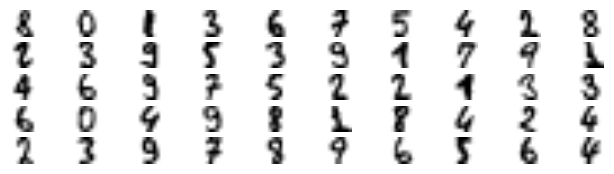

In [1999]:
# extra code – this cell generates and saves Figure 9–13

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(
        X_representative_digit.reshape(8, 8),
        cmap="binary",
        interpolation="bilinear"
    )
    plt.axis('off')

plt.show()
# Figure 9-13. Fifty representative digit images (one per cluster)

Let’s look at each image and manually label them:

In [2000]:
# since the numbers were manually labeled based on the plot above, there is a change that some numbers are wrong
# y_representative_digits = np.array([
#     8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
#     2, 3, 9, 5, 3, 9, 1, 7, 9, 3,
#     4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
#     6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
#     2, 3, 9, 7, 8, 9, 6, 5, 6, 4 
# ])
# todo: yes, I think there was some minor discrepancy, so I will use the following array

y_representative_digits = y_train[representative_digit_idx]

Now we have a dataset with just 50 labeled instances, but instead of being random instances, each of them is a representative image of its cluster. Let’s see if the performance is any better:

In [2001]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8312342569269522

Wow! We jumped from 74.8% accuracy to 84.9%, although we are still only training the model on 50 instances. Since it is often costly and painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster? This is called label propagation:

In [2002]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

Now let’s train the model again and look at its performance:

In [2003]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [2004]:
log_reg.score(X_test, y_test)

0.8690176322418136

We got another significant accuracy boost! Let’s see if we can do even better by ignoring the 1% of instances that are farthest from their cluster center: this should eliminate some outliers. The following code first computes the distance from each instance to its closest cluster center, then for each cluster it sets the 1% largest distances to –1. Lastly, it creates a set without these instances marked with a –1 distance:

In [2005]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

Now let’s train the model again on this partially propagated dataset and see what accuracy we get:

In [2006]:
log_reg = LogisticRegression(max_iter=10_000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8614609571788413

Nice! With just 50 labeled instances (only 5 examples per class on average!) we got 90.9% accuracy, which is actually slightly higher than the performance we got on the fully labeled digits dataset (90.7%). This is partly thanks to the fact that we dropped some outliers, and partly because the propagated labels are actually pretty good—their accuracy is about 97.5%, as the following code shows:


In [2007]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9614814814814815

TIP
Scikit-Learn also offers two classes that can propagate labels automatically: LabelSpreading and LabelPropagation in the sklearn.semi_supervised package. Both classes construct a similarity matrix between all the instances, and iteratively propagate labels from labeled instances to similar unlabeled instances. There’s also a very different class called SelfTrainingClassifier in the same package: you give it a base classifier (such as a RandomForestClassifier) and it trains it on the labeled instances, then uses it to predict labels for the unlabeled samples. It then updates the training set with the labels it is most confident about, and repeats this process of training and labeling until it cannot add labels anymore. These techniques are not magic bullets, but they can occasionally give your model a little boost.

ACTIVE LEARNING
To continue improving your model and your training set, the next step could be to do a few rounds of active learning, which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them. There are many different strategies for active learning, but one of the most common ones is called uncertainty sampling. Here is how it works:

1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.

2. The instances for which the model is most uncertain (i.e., where its estimated probability is lowest) are given to the expert for labeling.

3. You iterate this process until the performance improvement stops being worth the labeling effort.

Other active learning strategies include labeling the instances that would result in the largest model change or the largest drop in the model’s validation error, or the instances that different models disagree on (e.g., an SVM and a random forest).

Before we move on to Gaussian mixture models, let’s take a look at DBSCAN, another popular clustering algorithm that illustrates a very different approach based on local density estimation. This approach allows the algorithm to identify clusters of arbitrary shapes.

# DBSCAN
The density-based spatial clustering of applications with noise (DBSCAN) algorithm defines clusters as continuous regions of high density. Here is how it works:

- For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

- If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.

- All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

- Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

This algorithm works well if all the clusters are well separated by low-density regions. The DBSCAN class in Scikit-Learn is as simple to use as you might expect. Let’s test it on the moons dataset, introduced in Chapter 5:

In [2008]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

The labels of all the instances are now available in the labels_ instance variable:

In [2009]:
dbscan.labels_

array([ 0,  0,  1,  2,  0,  3,  4,  1,  0, -1,  5, -1,  0,  0,  3,  0,  0,
        0,  4,  0,  0,  1,  0,  4,  0,  6,  5,  5,  0,  0,  1,  5,  6,  5,
        0,  3,  2,  0,  5,  0,  7,  0,  0,  2,  2,  5,  6,  0,  1,  0,  0,
        5,  5,  0,  4,  5,  4,  6,  0,  0,  5,  2,  6,  0,  0,  5,  2,  3,
        1,  0,  0,  0,  0,  2,  0,  4,  3,  0,  0,  6,  2,  0, -1,  2, -1,
        0,  5,  6,  5,  3,  5,  2,  0,  4,  2,  0,  3,  1,  1,  0,  3,  6,
        0,  4,  0,  0,  5,  0,  1,  1,  0,  4, -1, -1,  0,  0,  5,  6,  3,
        2,  1,  2,  1,  2,  0,  5,  3,  4,  1, -1,  2,  0,  2,  3,  5,  7,
        6,  0, -1,  2,  0,  1,  8,  5,  5,  0,  3,  2,  5,  0,  5,  5,  0,
        0,  0,  0,  7,  0, -1,  0,  5,  0,  4,  3,  0,  5,  7,  5,  0,  4,
        2,  5,  1,  3,  6,  6,  6,  1,  5,  0,  1,  2,  0,  0,  4,  0,  8,
       -1, -1,  0,  6,  3,  0,  5,  2,  2,  0,  5,  2,  4,  2,  0,  0,  3,
        0, -1,  1,  2, -1,  3,  0,  4,  5,  6, -1,  7,  2,  1,  0,  2,  4,
        5,  3,  0, -1,  5

Notice that some instances have a cluster index equal to –1, which means that they are considered as anomalies by the algorithm. The indices of the core instances are available in the core_sample_indices_ instance variable, and the core instances themselves are available in the components_ instance variable:

In [2010]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  13,  15,
        16,  17,  19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  30,
        31,  32,  34,  35,  37,  38,  39,  40,  41,  44,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  83,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 110, 111, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134,
       135, 137, 139, 141, 142, 143, 144, 146, 147, 149, 150, 151, 153,
       155, 156, 159, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202,
       203, 204, 206, 207, 209, 210, 211, 212, 216, 217, 218, 22

In [2011]:
dbscan.components_

array([[-0.93428291,  0.21352052],
       [-0.92052196,  0.36636334],
       [ 0.06415769, -0.03613585],
       ...,
       [ 0.599866  , -0.45541674],
       [ 1.9733268 ,  0.40380636],
       [-0.7989937 ,  0.44649142]])

This clustering is represented in the lefthand plot of Figure 9-14. As you can see, it identified quite a lot of anomalies, plus seven different clusters. How disappointing! Fortunately, if we widen each instance’s neighborhood by increasing eps to 0.2, we get the clustering on the right, which looks perfect. Let’s continue with this model.

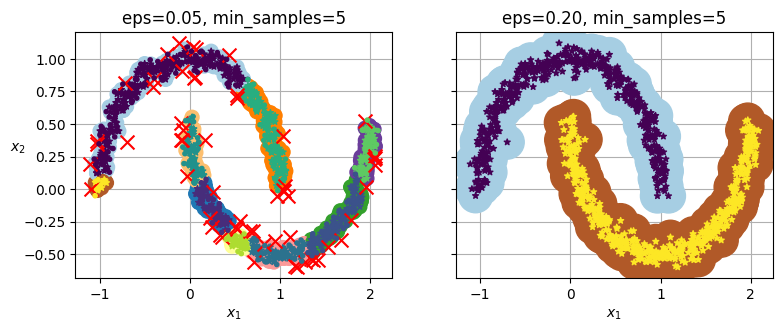

In [2012]:
# extra code – this cell generates and saves Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)


dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

# Figure 9-14. DBSCAN clustering using two different neighborhood radiuses

Surprisingly, the DBSCAN class does not have a predict() method, although it has a fit_predict() method. In other words, it cannot predict which cluster a new instance belongs to. This decision was made because different classification algorithms can be better for different tasks, so the authors decided to let the user choose which one to use. Moreover, it’s not hard to implement. For example, let’s train a KNeighborsClassifier:

In [2013]:
dbscan = dbscan2  # extra code – the text says we now use eps=0.2

In [2014]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Now, given a few new instances, we can predict which clusters they most likely belong to and even estimate a probability for each cluster:

In [2015]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1], dtype=int64)

In [2016]:
knn.predict_proba(X_new)

array([[0.84, 0.16],
       [0.  , 1.  ],
       [0.86, 0.14],
       [0.  , 1.  ]])

Note that we only trained the classifier on the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies: this choice depends on the final task.

The decision boundary is represented in Figure 9-15 (the crosses represent the four instances in X_new). Notice that since there is no anomaly in the training set, the classifier always chooses a cluster, even when that cluster is far away. It is fairly straightforward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies. To do this, use the kneighbors() method of the KNeighborsClassifier. Given a set of instances, it returns the distances and the indices of the k-nearest neighbors in the training set (two matrices, each with k columns):

In [2017]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1], dtype=int64)

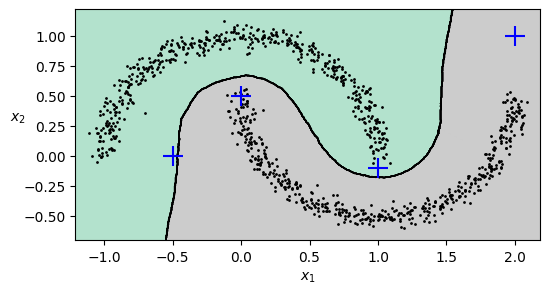

In [2018]:
# extra code – this cell generates and saves Figure 9–15

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()
# Figure 9-15. Decision boundary between two clusters

In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape. It is robust to outliers, and it has just two hyperparameters (eps and min_samples). If the density varies significantly across the clusters, however, or if there’s no sufficiently low-density region around some clusters, DBSCAN can struggle to capture all the clusters properly. Moreover, its computational complexity is roughly O(m2n), so it does not scale well to large datasets.

TIP
You may also want to try hierarchical DBSCAN (HDBSCAN), which is implemented in the scikit-learn-contrib project, as it is usually better than DBSCAN at finding clusters of varying densities.

# OTHER CLUSTERING ALGORITHMS
Scikit-Learn implements several more clustering algorithms that you should take a look at. I cannot cover them all in detail here, but here is a brief overview:


**BIRCH**
The balanced iterative reducing and clustering using hierarchies (BIRCH) algorithm was designed specifically for very large datasets, and it can be faster than batch k-means, with similar results, as long as the number of features is not too large (<20). During training, it builds a tree structure containing just enough information to quickly assign each new instance to a cluster, without having to store all the instances in the tree: this approach allows it to use limited memory while handling huge datasets.

**Mean-shift**
This algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean. Next, it iterates this mean-shifting step until all the circles stop moving (i.e., until each of them is centered on the mean of the instances it contains). Mean-shift shifts the circles in the direction of higher density, until each of them has found a local density maximum. Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster. Mean-shift has some of the same features as DBSCAN, like how it can find any number of clusters of any shape, it has very few hyperparameters (just one—the radius of the circles, called the bandwidth), and it relies on local density estimation. But unlike DBSCAN, mean-shift tends to chop clusters into pieces when they have internal density variations. Unfortunately, its computational complexity is O(m2n), so it is not suited for large datasets.

**Affinity propagation**
In this algorithm, instances repeatedly exchange messages between one another until every instance has elected another instance (or itself) to represent it. These elected instances are called exemplars. Each exemplar and all the instances that elected it form one cluster. In real-life politics, you typically want to vote for a candidate whose opinions are similar to yours, but you also want them to win the election, so you might choose a candidate you don’t fully agree with, but who is more popular. You typically evaluate popularity through polls. Affinity propagation works in a similar way, and it tends to choose exemplars located near the center of clusters, similar to k-means. But unlike with k-means, you don’t have to pick a number of clusters ahead of time: it is determined during training. Moreover, affinity propagation can deal nicely with clusters of different sizes. Sadly, this algorithm has a computational complexity of O(m2), so it is not suited for large datasets.


**Spectral clustering**
This algorithm takes a similarity matrix between the instances and creates a low-dimensional embedding from it (i.e., it reduces the matrix’s dimensionality), then it uses another clustering algorithm in this low-dimensional space (Scikit-Learn’s implementation uses k-means). Spectral clustering can capture complex cluster structures, and it can also be used to cut graphs (e.g., to identify clusters of friends on a social network). It does not scale well to large numbers of instances, and it does not behave well when the clusters have very different sizes.

Now let’s dive into Gaussian mixture models, which can be used for density estimation, clustering, and anomaly detection.

In [2019]:
from sklearn.cluster import SpectralClustering

In [2020]:
sc1 = SpectralClustering(n_clusters=2, 
                         gamma=100, 
                         random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [2021]:
sc1.affinity_matrix_.round(2)

array([[1.  , 0.09, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.09, 1.  , 0.  , ..., 0.  , 0.12, 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.03],
       [0.  , 0.12, 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.  , 1.  ]])

In [2022]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [2023]:
def plot_spectral_clustering(
        sc,
        X,
        size,
        alpha,
        show_xlabels=True,
        show_ylabels=True
):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"RBF gamma={sc.gamma}")

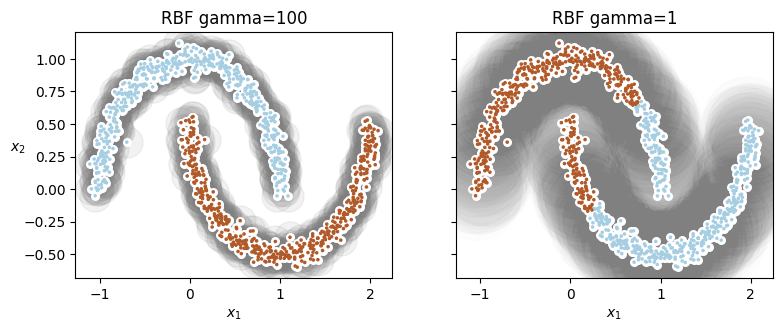

In [2024]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

**Agglomerative clustering**
A hierarchy of clusters is built from the bottom up. Think of many tiny bubbles floating on water and gradually attaching to each other until there’s one big group of bubbles. Similarly, at each iteration, agglomerative clustering connects the nearest pair of clusters (starting with individual instances). If you drew a tree with a branch for every pair of clusters that merged, you would get a binary tree of clusters, where the leaves are the individual instances. This approach can capture clusters of various shapes; it also produces a flexible and informative cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance. It can scale nicely to large numbers of instances if you provide a connectivity matrix, which is a sparse m × m matrix that indicates which pairs of instances are neighbors (e.g., returned by sklearn.neighbors.kneighbors_graph()). Without a connectivity matrix, the algorithm does not scale well to large datasets.

In [2025]:
from sklearn.cluster import AgglomerativeClustering

In [2026]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)

In [2027]:
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [2028]:

def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [2029]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [2030]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# GAUSSIAN MIXTURE MODELS
A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation, just like in Figure 9-11. When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you do not know what the parameters of these distributions are.

There are several GMM variants. In the simplest variant, implemented in the GaussianMixture class, you must know in advance the number k of Gaussian distributions. The dataset X is assumed to have been generated through the following probabilistic process:

- For each instance, a cluster is picked randomly from among k clusters. The probability of choosing the jth cluster is the cluster’s weight ϕ(j).⁠6 The index of the cluster chosen for the ith instance is noted z(i).

- If the ith instance was assigned to the jth cluster (i.e., z(i) = j), then the location x(i) of this instance is sampled randomly from the Gaussian distribution with mean μ(j) and covariance matrix Σ(j). This is noted x(i) ~ 𝒩(μ(j), Σ(j)).

So what can you do with such a model? Well, given the dataset X, you typically want to start by estimating the weights ϕ and all the distribution parameters μ(1) to μ(k) and Σ(1) to Σ(k). Scikit-Learn’s GaussianMixture class makes this super easy:

In [2031]:
# Let's generate the same dataset as earliers with three ellipsoids (the one K-Means had trouble with):
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [2032]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

Let’s look at the parameters that the algorithm estimated:

In [2033]:
gm.weights_

array([0.40003756, 0.209222  , 0.39074045])

In [2034]:
gm.means_

array([[-1.4075545 ,  1.42736973],
       [ 3.40291721,  1.05786719],
       [ 0.05279986,  0.07693674]])

In [2035]:
gm.covariances_

array([[[ 0.6350027 ,  0.72989986],
        [ 0.72989986,  1.16086887]],

       [[ 1.14230747, -0.03084924],
        [-0.03084924,  0.95386529]],

       [[ 0.69050552,  0.79835568],
        [ 0.79835568,  1.21476718]]])

Great, it worked fine! Indeed, two of the three clusters were generated with 500 instances each, while the third cluster only contains 250 instances. So the true cluster weights are 0.4, 0.4, and 0.2, respectively, and that’s roughly what the algorithm found. Similarly, the true means and covariance matrices are quite close to those found by the algorithm. But how? This class relies on the expectation-maximization (EM) algorithm, which has many similarities with the k-means algorithm: it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the expectation step) and then updating the clusters (this is called the maximization step). Sounds familiar, right? In the context of clustering, you can think of EM as a generalization of k-means that not only finds the cluster centers (μ(1) to μ(k)), but also their size, shape, and orientation (Σ(1) to Σ(k)), as well as their relative weights (ϕ(1) to ϕ(k)). Unlike k-means, though, EM uses soft cluster assignments, not hard assignments. For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the responsibilities of the clusters for the instances. During the maximization step, each cluster’s update will mostly be impacted by the instances it is most responsible for.

WARNING
Unfortunately, just like k-means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10. Be careful: by default n_init is set to 1.

You can check whether or not the algorithm converged and how many iterations it took:

In [2036]:
gm.converged_

True

In [2037]:
gm.n_iter_

5

Now that you have an estimate of the location, size, shape, orientation, and relative weight of each cluster, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering). Just use the predict() method for hard clustering, or the predict_proba() method for soft clustering:

In [2038]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

In [2039]:
gm.predict_proba(X).round(3)

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

A Gaussian mixture model is a generative model, meaning you can sample new instances from it (note that they are ordered by cluster index):

In [2040]:
X_new, y_new = gm.sample(6)

In [2041]:
X_new

array([[ 0.00681911,  2.98579228],
       [ 4.16785735, -0.46010011],
       [-0.28770018,  1.57416493],
       [-0.61406547, -0.58550159],
       [ 0.28491419, -0.0395043 ],
       [ 0.8999436 ,  0.16029631]])

In [2042]:
y_new

array([0, 1, 2, 2, 2, 2])

It is also possible to estimate the density of the model at any given location. This is achieved using the score_samples() method: for each instance it is given, this method estimates the log of the probability density function (PDF) at that location. The greater the score, the higher the density:

In [2043]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

If you compute the exponential of these scores, you get the value of the PDF at the location of the given instances. These are not probabilities, but probability densities: they can take on any positive value, not just a value between 0 and 1. To estimate the probability that an instance will fall within a particular region, you would have to integrate the PDF over that region (if you do so over the entire space of possible instance locations, the result will be 1).

In [2044]:
# Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

# extra code – bonus material

resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999276188


Figure 9-16 shows the cluster means, the decision boundaries (dashed lines), and the density contours of this model.

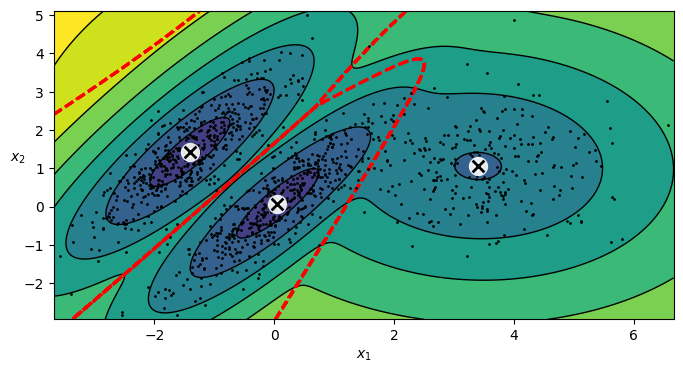

In [2045]:
# extra code – this cells generates and saves Figure 9–16

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()
# Figure 9-16. Cluster means, decision boundaries, and density contours of a trained Gaussian mixture model

Nice! The algorithm clearly found an excellent solution. Of course, we made its task easy by generating the data using a set of 2D Gaussian distributions (unfortunately, real-life data is not always so Gaussian and low-dimensional). We also gave the algorithm the correct number of clusters. When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution. You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn. One way to do this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices. To do this, set the covariance_type hyperparameter to one of the following values:

**"spherical"**
All clusters must be spherical, but they can have different diameters (i.e., different variances).

**"diag"**
Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).

**"tied"**
All clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix).

By default, covariance_type is equal to "full", which means that each cluster can take on any shape, size, and orientation (it has its own unconstrained covariance matrix). Figure 9-17 plots the solutions found by the EM algorithm when covariance_type is set to "tied" or "spherical".

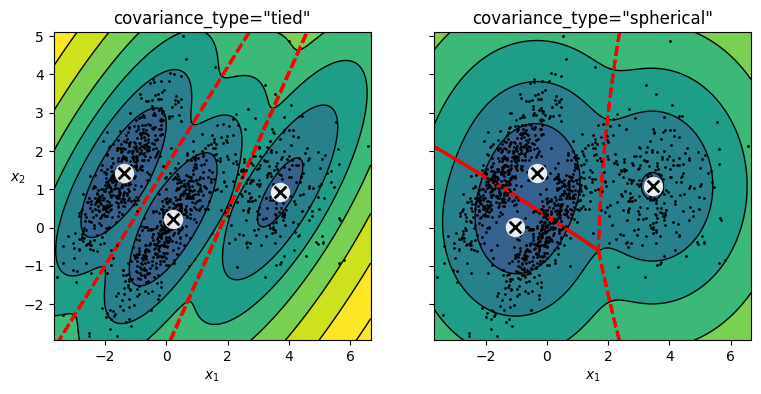

In [2046]:
# extra code – this cell generates and saves Figure 9–17

gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

# Figure 9-17. Gaussian mixtures for tied clusters (left) and spherical clusters (right)

NOTE
The computational complexity of training a GaussianMixture model depends on the number of instances m, the number of dimensions n, the number of clusters k, and the constraints on the covariance matrices. If covariance_type is "spherical" or "diag", it is O(kmn), assuming the data has a clustering structure. If covariance_type is "tied" or "full", it is O(kmn2 + kn3), so it will not scale to large numbers of features.

Gaussian mixture models can also be used for anomaly detection. We’ll see how in the next section.

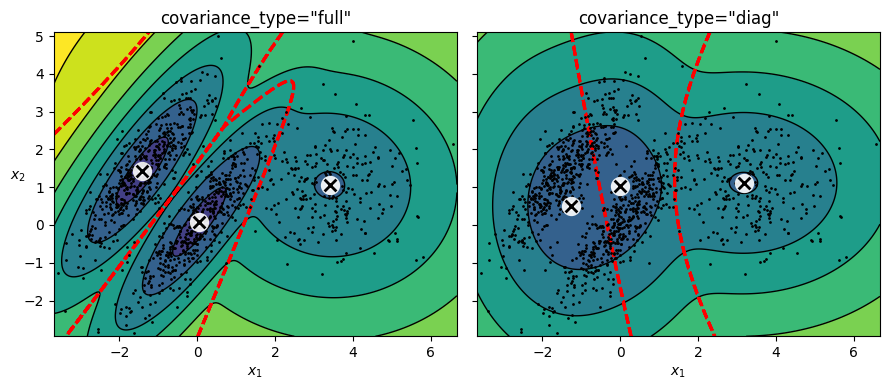

In [2047]:
# extra code – comparing covariance_type="full" and covariance_type="diag"
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

# USING GAUSSIAN MIXTURE MODELS FOR ANOMALY DETECTION
Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well known. Say it is equal to 2%. You then set the density threshold to be the value that results in having 2% of the instances located in areas below that threshold density. If you notice that you get too many false positives (i.e., perfectly good products that are flagged as defective), you can lower the threshold. Conversely, if you have too many false negatives (i.e., defective products that the system does not flag as defective), you can increase the threshold. This is the usual precision/recall trade-off (see Chapter 3). Here is how you would identify the outliers using the fourth percentile lowest density as the threshold (i.e., approximately 4% of the instances will be flagged as anomalies):

In [2048]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

Figure 9-18 represents these anomalies as stars.

A closely related task is novelty detection: it differs from anomaly detection in that the algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Indeed, outlier detection is often used to clean up a dataset.

TIP
Gaussian mixture models try to fit all the data, including the outliers; if you have too many of them this will bias the model’s view of “normality”, and some outliers may wrongly be considered as normal. If this happens, you can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned-up dataset. Another approach is to use robust covariance estimation methods (see the EllipticEnvelope class).

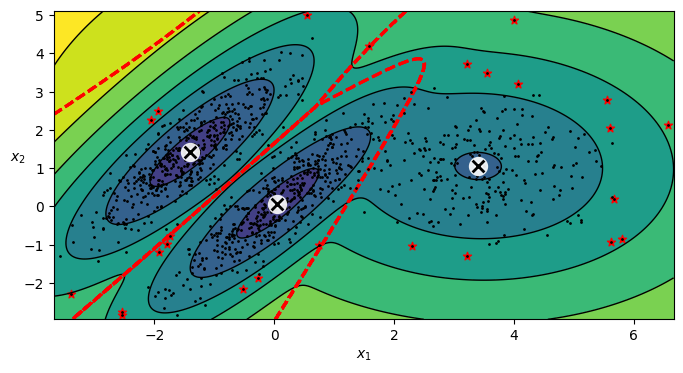

In [2049]:
# extra code – this cell generates and saves Figure 9–18

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

# Figure 9-18. Anomaly detection using a Gaussian mixture model

Just like k-means, the GaussianMixture algorithm requires you to specify the number of clusters. So how can you find that number?

# SELECTING THE NUMBER OF CLUSTERS
With k-means, you can use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. Instead, you can try to find the model that minimizes a theoretical information criterion, such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC), defined in Equation 9-1.

Equation 9-1. Bayesian information criterion (BIC) and Akaike information criterion (AIC)

$BIC = log(m)p - 2 \, log(\hat{L})$\
$AIC = 2p - 2 \, log(\hat{L})$

where:
$m$ is the number of instances, as usual
$p$ is the number of parameters learned by the model
$\hat{L}$ is the maximized value of the likelihood function of the model. This is the likelihood of the model, given the data.

Both the BIC and the AIC penalize models that have more parameters to learn (e.g., more clusters) and reward models that fit the data well. They often end up selecting the same model. When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is especially true for larger datasets).

LIKELIHOOD FUNCTION
The terms “probability” and “likelihood” are often used interchangeably in everyday language, but they have very different meanings in statistics. Given a statistical model with some parameters θ, the word “probability” is used to describe how plausible a future outcome x is (knowing the parameter values θ), while the word “likelihood” is used to describe how plausible a particular set of parameter values θ are, after the outcome x is known.

Consider a 1D mixture model of two Gaussian distributions centered at –4 and +1. For simplicity, this toy model has a single parameter θ that controls the standard deviations of both distributions. The top-left contour plot in Figure 9-19 shows the entire model f(x; θ) as a function of both x and θ. To estimate the probability distribution of a future outcome x, you need to set the model parameter θ. For example, if you set θ to 1.3 (the horizontal line), you get the probability density function f(x; θ=1.3) shown in the lower-left plot. Say you want to estimate the probability that x will fall between –2 and +2. You must calculate the integral of the PDF on this range (i.e., the surface of the shaded region). But what if you don’t know θ, and instead if you have observed a single instance x=2.5 (the vertical line in the upper-left plot)? In this case, you get the likelihood function ℒ(θ|x=2.5)=f(x=2.5; θ), represented in the upper-right plot.

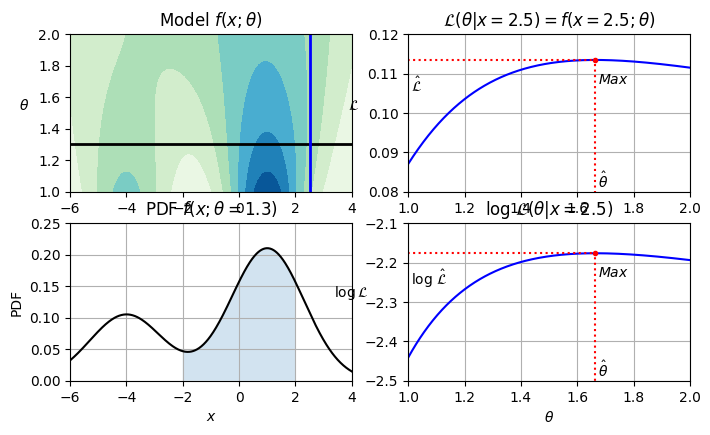

In [2050]:
# extra code – this cell generates and saves Figure 9–19

from scipy.stats import norm

x_val = 2.5
std_val = 1.3
x_range = [-6, 4]
x_proba_range = [-2, 2]
stds_range = [1, 2]

xs = np.linspace(x_range[0], x_range[1], 501)
stds = np.linspace(stds_range[0], stds_range[1], 501)
Xs, Stds = np.meshgrid(xs, stds)
Z = 2 * norm.pdf(Xs - 1.0, 0, Stds) + norm.pdf(Xs + 4.0, 0, Stds)
Z = Z / Z.sum(axis=1)[:, np.newaxis] / (xs[1] - xs[0])

x_example_idx = (xs >= x_val).argmax()  # index of the first value >= x_val
max_idx = Z[:, x_example_idx].argmax()
max_val = Z[:, x_example_idx].max()
s_example_idx = (stds >= std_val).argmax()
x_range_min_idx = (xs >= x_proba_range[0]).argmax()
x_range_max_idx = (xs >= x_proba_range[1]).argmax()
log_max_idx = np.log(Z[:, x_example_idx]).argmax()
log_max_val = np.log(Z[:, x_example_idx]).max()

plt.figure(figsize=(8, 4.5))

plt.subplot(2, 2, 1)
plt.contourf(Xs, Stds, Z, cmap="GnBu")
plt.plot([-6, 4], [std_val, std_val], "k-", linewidth=2)
plt.plot([x_val, x_val], [1, 2], "b-", linewidth=2)
plt.ylabel(r"$\theta$", rotation=0, labelpad=10)
plt.title(r"Model $f(x; \theta)$")

plt.subplot(2, 2, 2)
plt.plot(stds, Z[:, x_example_idx], "b-")
plt.plot(stds[max_idx], max_val, "r.")
plt.plot([stds[max_idx], stds[max_idx]], [0, max_val], "r:")
plt.plot([0, stds[max_idx]], [max_val, max_val], "r:")
plt.text(stds[max_idx]+ 0.01, 0.081, r"$\hat{\theta}$")
plt.text(stds[max_idx]+ 0.01, max_val - 0.006, r"$Max$")
plt.text(1.01, max_val - 0.008, r"$\hat{\mathcal{L}}$")
plt.ylabel(r"$\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\mathcal{{L}}(\theta|x={x_val}) = f(x={x_val}; \theta)$")
plt.grid()
plt.axis([1, 2, 0.08, 0.12])

plt.subplot(2, 2, 3)
plt.plot(xs, Z[s_example_idx], "k-")
plt.fill_between(xs[x_range_min_idx:x_range_max_idx+1],
                 Z[s_example_idx, x_range_min_idx:x_range_max_idx+1], alpha=0.2)
plt.xlabel(r"$x$")
plt.ylabel("PDF")
plt.title(fr"PDF $f(x; \theta={std_val})$")
plt.grid()
plt.axis([-6, 4, 0, 0.25])

plt.subplot(2, 2, 4)
plt.plot(stds, np.log(Z[:, x_example_idx]), "b-")
plt.plot(stds[log_max_idx], log_max_val, "r.")
plt.plot([stds[log_max_idx], stds[log_max_idx]], [-5, log_max_val], "r:")
plt.plot([0, stds[log_max_idx]], [log_max_val, log_max_val], "r:")
plt.text(stds[log_max_idx]+ 0.01, log_max_val - 0.06, r"$Max$")
plt.text(stds[log_max_idx]+ 0.01, -2.49, r"$\hat{\theta}$")
plt.text(1.01, log_max_val - 0.08, r"$\log \, \hat{\mathcal{L}}$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\log \, \mathcal{{L}}(\theta|x={x_val})$")
plt.grid()
plt.axis([1, 2, -2.5, -2.1])

plt.show()
# Figure 9-19. A model’s parametric function (top left), and some derived functions: a PDF (lower left), a likelihood function (top right), and a log likelihood function (lower right)

In short, the PDF is a function of x (with θ fixed), while the likelihood function is a function of θ (with x fixed). It is important to understand that the likelihood function is not a probability distribution: if you integrate a probability distribution over all possible values of x, you always get 1, but if you integrate the likelihood function over all possible values of θ the result can be any positive value.

Given a dataset X, a common task is to try to estimate the most likely values for the model parameters. To do this, you must find the values that maximize the likelihood function, given X. In this example, if you have observed a single instance x=2.5, the maximum likelihood estimate (MLE) of θ is 
𝛉
≈1.66. If a prior probability distribution g over θ exists, it is possible to take it into account by maximizing ℒ(θ|x)g(θ) rather than just maximizing ℒ(θ|x). This is called maximum a-posteriori (MAP) estimation. Since MAP constrains the parameter values, you can think of it as a regularized version of MLE.

Notice that maximizing the likelihood function is equivalent to maximizing its logarithm (represented in the lower-right plot in Figure 9-19). Indeed, the logarithm is a strictly increasing function, so if θ maximizes the log likelihood, it also maximizes the likelihood. It turns out that it is generally easier to maximize the log likelihood. For example, if you observed several independent instances x(1) to x(m), you would need to find the value of θ that maximizes the product of the individual likelihood functions. But it is equivalent, and much simpler, to maximize the sum (not the product) of the log likelihood functions, thanks to the magic of the logarithm which converts products into sums: log(ab) = log(a) + log(b).

Once you have estimated 
𝛉
, the value of θ that maximizes the likelihood function, then you are ready to compute 
𝛉
, which is the value used to compute the AIC and BIC; you can think of it as a measure of how well the model fits the data.

To compute the BIC and AIC, call the bic() and aic() methods:

In [2051]:
gm.bic(X)


8189.6299258817335

In [2052]:
gm.aic(X)

8102.4046457666955

We could compute the BIC manually like this:

In [2053]:
# extra code – bonus material
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 8189.6299258817335
aic = 8102.4046457666955
n_params = 17


There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n$ x $n$ 
 covariance matrix is not $n^2$, but $1 + 2 + ...+ n = \frac{n(n+1)}{2}$.

Figure 9-20 shows the BIC for different numbers of clusters k. As you can see, both the BIC and the AIC are lowest when k=3, so it is most likely the best choice.

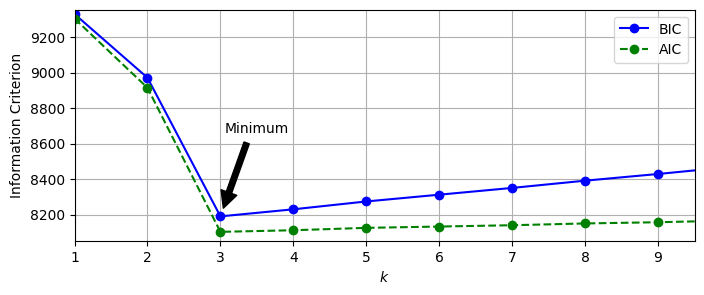

In [2054]:
# extra code – this cell generates and saves Figure 9–20

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()
plt.show()
# Figure 9-20. AIC and BIC for different numbers of clusters k

# BAYESIAN GAUSSIAN MIXTURE MODELS
Rather than manually searching for the optimal number of clusters, you can use the BayesianGaussianMixture class, which is capable of giving weights equal (or close) to zero to unnecessary clusters. Set the number of clusters n_components to a value that you have good reason to believe is greater than the optimal number of clusters (this assumes some minimal knowledge about the problem at hand), and the algorithm will eliminate the unnecessary clusters automatically. For example, let’s set the number of clusters to 10 and see what happens:


In [2055]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

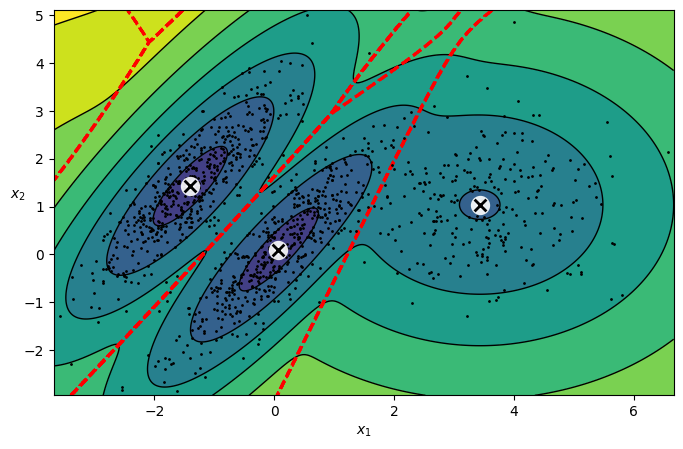

In [2056]:
# extra code – this figure is almost identical to Figure 9–16
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

Perfect: the algorithm automatically detected that only three clusters are needed, and the resulting clusters are almost identical to the ones in Figure 9-16.

A final note about Gaussian mixture models: although they work great on clusters with ellipsoidal shapes, they don’t do so well with clusters of very different shapes. For example, let’s see what happens if we use a Bayesian Gaussian mixture model to cluster the moons dataset (see Figure 9-21).

C:\Users\lazni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


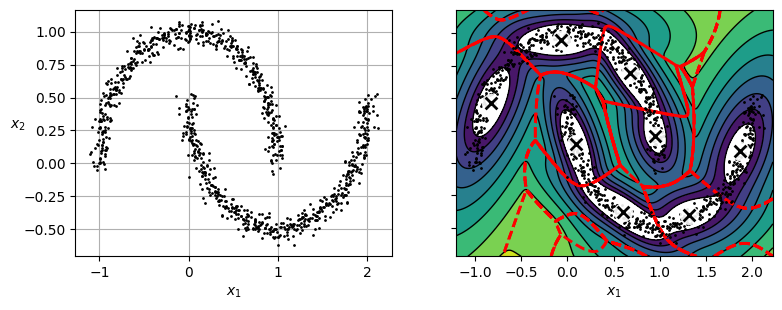

In [2057]:
# extra code – this cell generates and saves Figure 9–21

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()
# Figure 9-21. Fitting a Gaussian mixture to nonellipsoidal clusters


Oops! The algorithm desperately searched for ellipsoids, so it found eight different clusters instead of two. The density estimation is not too bad, so this model could perhaps be used for anomaly detection, but it failed to identify the two moons. To conclude this chapter, let’s take a quick look at a few algorithms capable of dealing with arbitrarily shaped clusters.

# OTHER ALGORITHMS FOR ANOMALY AND NOVELTY DETECTION
Scikit-Learn implements other algorithms dedicated to anomaly detection or novelty detection:

**Fast-MCD** (minimum covariance determinant)
Implemented by the EllipticEnvelope class, this algorithm is useful for outlier detection, in particular to clean up a dataset. It assumes that the normal instances (inliers) are generated from a single Gaussian distribution (not a mixture). It also assumes that the dataset is contaminated with outliers that were not generated from this Gaussian distribution. When the algorithm estimates the parameters of the Gaussian distribution (i.e., the shape of the elliptic envelope around the inliers), it is careful to ignore the instances that are most likely outliers. This technique gives a better estimation of the elliptic envelope and thus makes the algorithm better at identifying the outliers.

**Isolation forest**
This is an efficient algorithm for outlier detection, especially in high-dimensional datasets. The algorithm builds a random forest in which each decision tree is grown randomly: at each node, it picks a feature randomly, then it picks a random threshold value (between the min and max values) to split the dataset in two. The dataset gradually gets chopped into pieces this way, until all instances end up isolated from the other instances. Anomalies are usually far from other instances, so on average (across all the decision trees) they tend to get isolated in fewer steps than normal instances.

**Local outlier factor (LOF)**
This algorithm is also good for outlier detection. It compares the density of instances around a given instance to the density around its neighbors. An anomaly is often more isolated than its k-nearest neighbors.

**One-class SVM**
This algorithm is better suited for novelty detection. Recall that a kernelized SVM classifier separates two classes by first (implicitly) mapping all the instances to a high-dimensional space, then separating the two classes using a linear SVM classifier within this high-dimensional space (see Chapter 5). Since we just have one class of instances, the one-class SVM algorithm instead tries to separate the instances in high-dimensional space from the origin. In the original space, this will correspond to finding a small region that encompasses all the instances. If a new instance does not fall within this region, it is an anomaly. There are a few hyperparameters to tweak: the usual ones for a kernelized SVM, plus a margin hyperparameter that corresponds to the probability of a new instance being mistakenly considered as novel when it is in fact normal. It works great, especially with high-dimensional datasets, but like all SVMs it does not scale to large datasets.

**PCA and other dimensionality reduction techniques with an inverse_transform() method**
If you compare the reconstruction error of a normal instance with the reconstruction error of an anomaly, the latter will usually be much larger. This is a simple and often quite efficient anomaly detection approach (see this chapter’s exercises for an example).

# EXTRA MATERIALS / EXERCISES

In [2058]:
# TODO: add exercises and the rest from github